# Data Preparation

In [2]:
import re
import string

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd

from gensim.models import KeyedVectors
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split 

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

RANDOM_SEED = 19730115
rng = np.random.RandomState(RANDOM_SEED)

print("Required packages installed.")

Required packages installed.


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gomesluiz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def load_dataset(path):
    """Get the data from csv file
    
    Args:
        path(str): the file complete path. 

    Returns:
        A pandas dataframe.
    """

    return pd.read_csv(path)


def clean_text(text):
    """ Make text lowercase, remove text in square brackets, remove punctuation and 
        remove words containing numbers.
    
    Args:
        text(str): string text to be cleaned.

    Returns:
        A cleaned text

    """

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[``""...]', '', text)
    text = re.sub('\n', ' ', text)

    return text

In [4]:
# Load the reviews dataset.
reviews = load_dataset('../data/processed/buscape_reviews_full_dataset.csv')

# Replace the original polarity to -1 from 0, nan to 0.  
reviews_cleaned = reviews.copy() 
reviews_cleaned['polarity'] = reviews_cleaned['polarity'].replace({0:-1, np.nan: 0})
reviews_cleaned['polarity'] = reviews_cleaned['polarity'].astype(int)
# 
reviews_cleaned.dropna(subset=['review_text_cleaned_no_stopwords'], inplace=True)
reviews_cleaned.head()

,original_index,review_text,review_text_cleaned,review_text_cleaned_len,review_text_cleaned_no_stopwords,review_text_cleaned_len_no_stopwords,polarity
0,4_55516,"Estou muito satisfeito, o visor é melhor do qu...",estou muito satisfeito o visor é melhor do que...,45,satisfeito visor melhor imaginava boas imagens...,25,1
1,minus_1_105339,"""muito boa\n\nO que gostei: preco\n\nO que não...",muito boa o que gostei preco o que não goste...,12,boa gostei preco gostei poderia,5,1
2,23_382139,"Rápida, ótima qualidade de impressão e fácil d...",rápida ótima qualidade de impressão e fácil de...,37,rápida ótima qualidade impressão fácil usar pr...,22,1
3,2_446456,Produto de ótima qualidade em todos os quesito!,produto de ótima qualidade em todos os quesito,8,produto ótima qualidade todos quesito,5,1
4,0_11324,Precisava comprar uma tv compatível com meu dv...,precisava comprar uma tv compatível com meu dv...,38,precisava comprar tv compatível dvd esra melho...,17,1


<AxesSubplot: title={'center': 'Polarity Distribution'}>

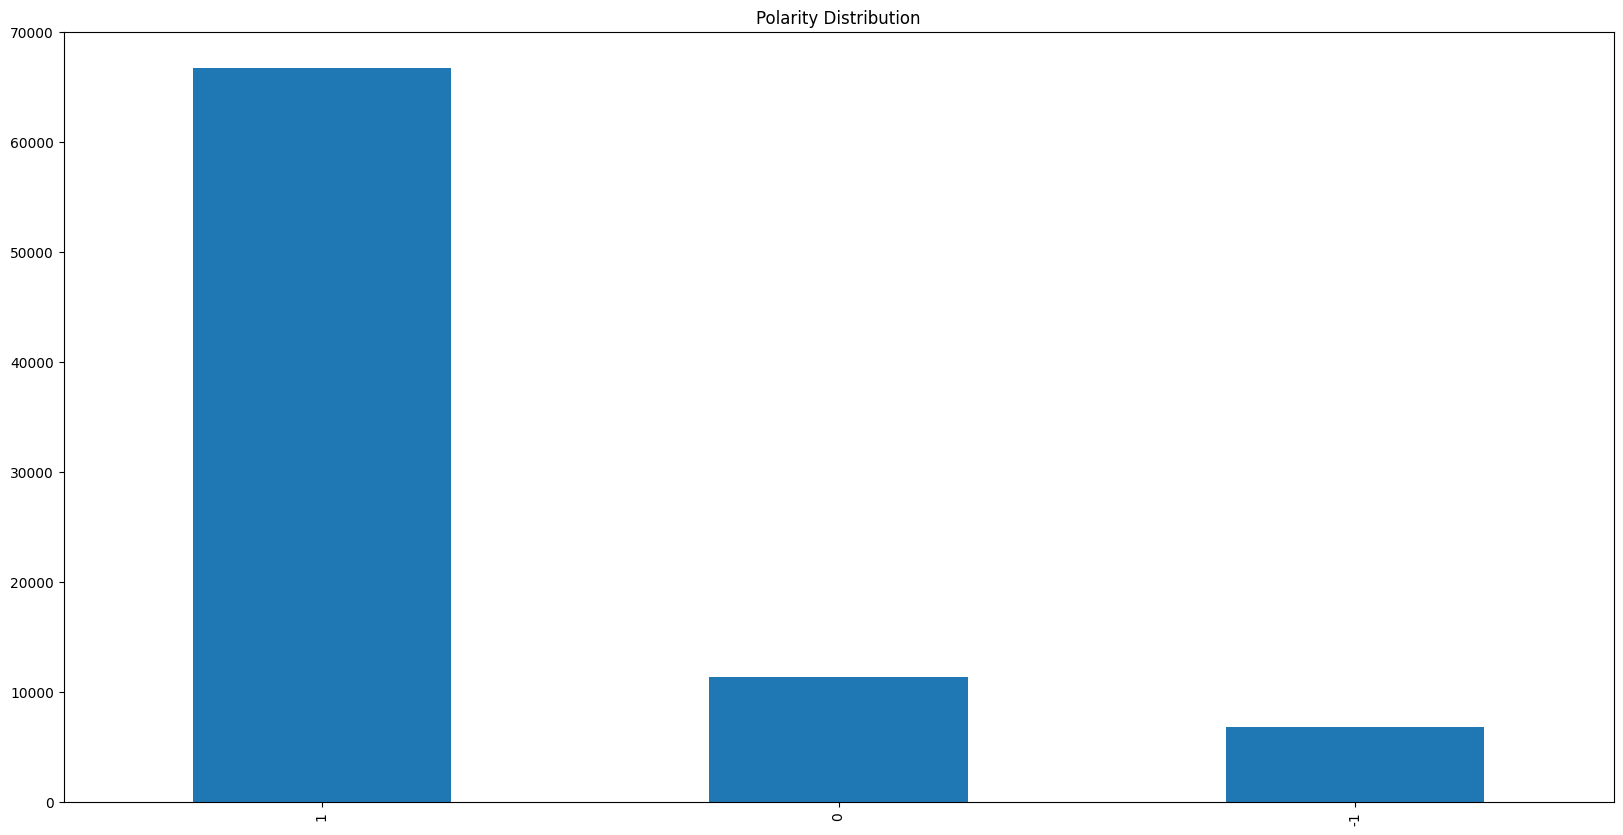

In [5]:
plt.figure(figsize=(20, 10))
plt.title('Polarity Distribution')
reviews_cleaned['polarity'].value_counts().plot(kind='bar')

### Split in train and test datasets

In [6]:
reviews_cleaned_train, reviews_cleaned_test = train_test_split(reviews_cleaned, stratify=reviews_cleaned['polarity'], test_size=.20, random_state=rng)

In [7]:
reviews_cleaned_train.to_csv("../data/processed/buscape_reviews_train_dataset.csv", index=False)
reviews_cleaned_test.to_csv("../data/processed/buscape_reviews_test_dataset.csv", index=False)